In [1]:
# ✅ Instalar dependencias si estás fuera de un entorno virtual Conda
!pip install -q pandas numpy matplotlib seaborn scikit-learn optuna scikit-optimize hyperopt nbformat


In [5]:
# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# ✅ Ir un solo nivel hacia arriba (de notebook/ a la raíz del proyecto)
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


In [8]:
import matplotlib.pyplot as plt
from src.utils import cargar_dataset, preprocesar_datos, entrenar_modelo_base
from src.optimizacion import (
    optimizar_con_gridsearch,
    optimizar_con_randomsearch,
)
from src.visualizador import (
    visualizar_matriz_confusion,
    visualizar_curva_roc,
    graficar_metricas_comparativas,
)



🚀 Iniciando pipeline de clasificación de diabetes...

✨ Primeras filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

ℹ️ Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    ---

<Figure size 600x500 with 0 Axes>

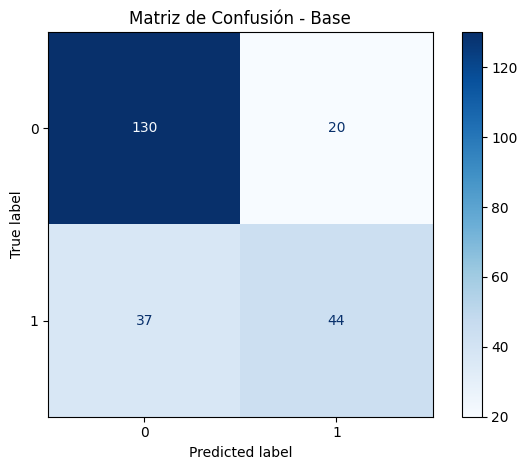

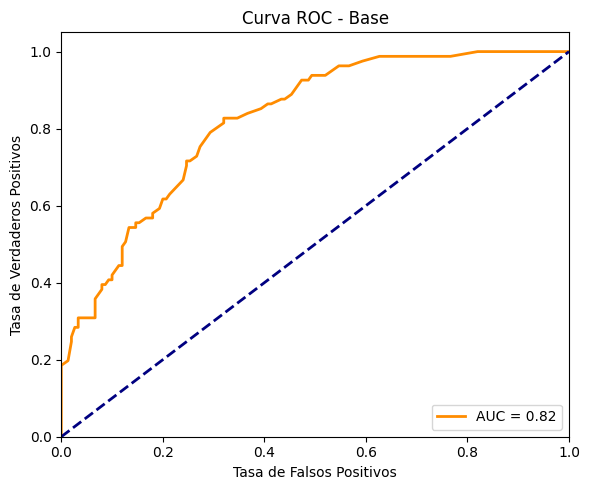


🔧 Grid Search en progreso...
✅ Mejores parámetros Grid Search: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

📊 Evaluación GridSearch:
F1-Score: 0.5931
Precision: 0.6719
Recall: 0.5309
AUC: 0.8248
⏱️ Tiempo de optimización: 5.20 segundos


<Figure size 600x500 with 0 Axes>

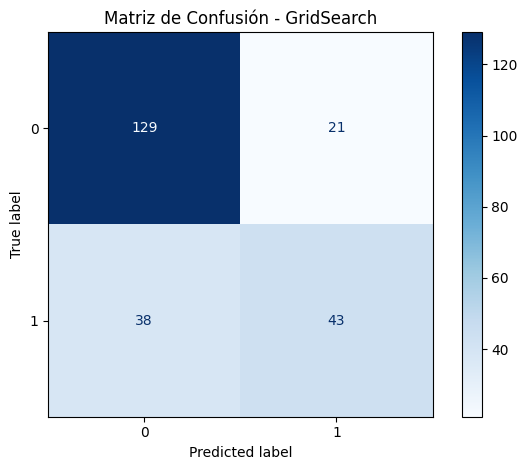

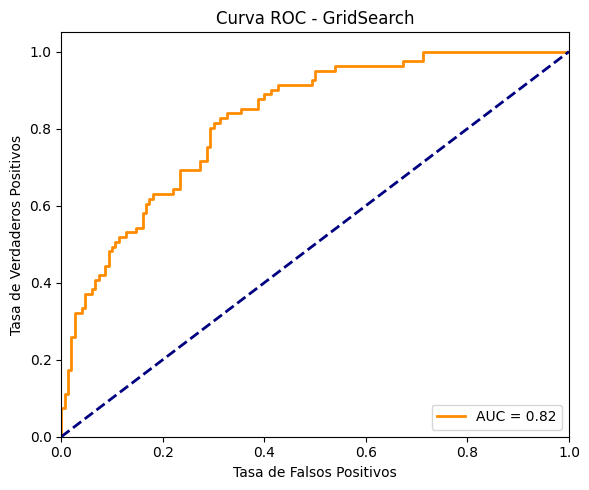


🍀 Random Search en progreso...


/home/mparraf/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 48 is smaller than n_iter=500. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Mejores parámetros Random Search: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}

📊 Evaluación RandomSearch:
F1-Score: 0.5931
Precision: 0.6719
Recall: 0.5309
AUC: 0.8248
⏱️ Tiempo de optimización: 3.61 segundos


<Figure size 600x500 with 0 Axes>

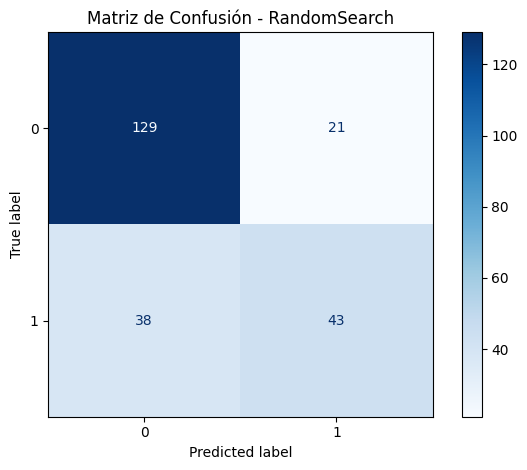

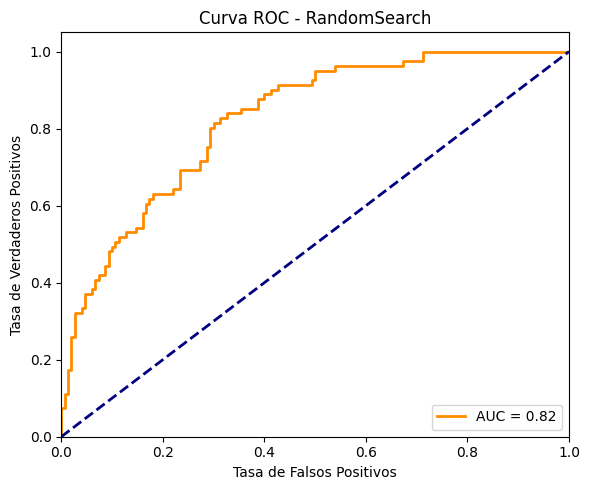

/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo4Clase2MarcoParra/src/visualizador.py:81: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo4Clase2MarcoParra/src/visualizador.py:84: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("outputs/comparacion_metricas_modelos.png")
/home/mparraf/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


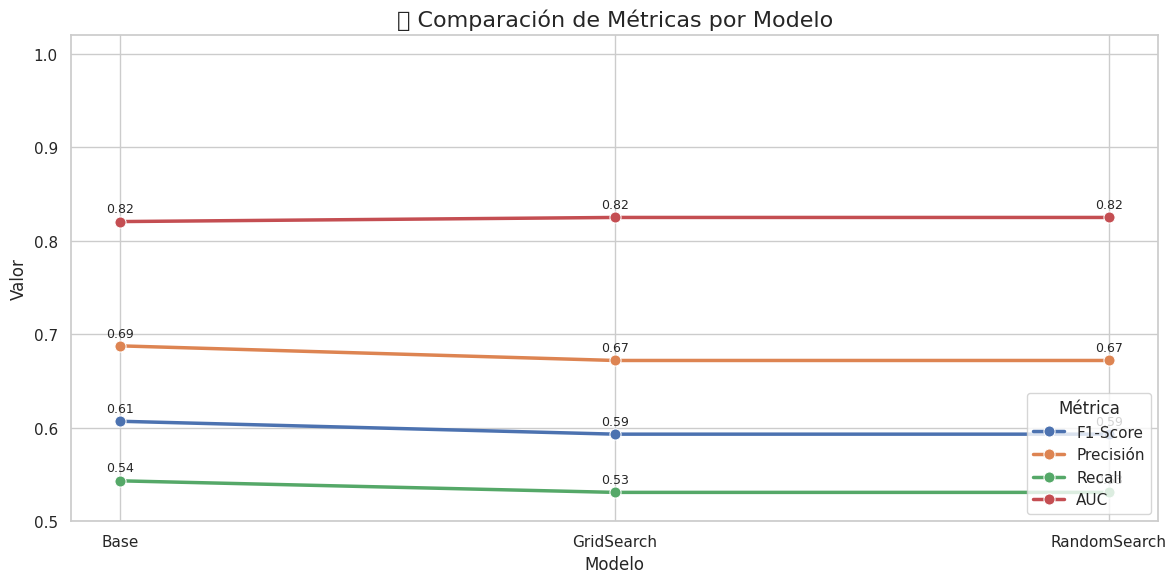


📌 Reflexión Final:
- GridSearch suele encontrar buenos modelos pero puede ser más lento.
- RandomSearch explora más y puede ser más eficiente con menos combinaciones.
- Comparar tiempos, F1 y AUC para definir cuál se adapta mejor al problema.

✅ Pipeline completado.


In [9]:
print("\n🚀 Iniciando pipeline de clasificación de diabetes...")

df = cargar_dataset()
X_train, X_test, y_train, y_test = preprocesar_datos(df)

resultados = []

# Modelo base
resultado_base = entrenar_modelo_base(X_train, y_train, X_test, y_test)
resultados.append(resultado_base)
visualizar_matriz_confusion(y_test, resultado_base["y_pred"], metodo="Base")
visualizar_curva_roc(y_test, resultado_base["y_prob"], metodo="Base")

# Grid Search
resultado_grid = optimizar_con_gridsearch(X_train, y_train, X_test, y_test)
resultados.append(resultado_grid)
visualizar_matriz_confusion(y_test, resultado_grid["y_pred"], metodo="GridSearch")
visualizar_curva_roc(y_test, resultado_grid["y_prob"], metodo="GridSearch")

# Random Search
resultado_random = optimizar_con_randomsearch(X_train, y_train, X_test, y_test)
resultados.append(resultado_random)
visualizar_matriz_confusion(y_test, resultado_random["y_pred"], metodo="RandomSearch")
visualizar_curva_roc(y_test, resultado_random["y_prob"], metodo="RandomSearch")

# Comparación final
graficar_metricas_comparativas(resultados)

# Reflexión
print("\n📌 Reflexión Final:")
print("- GridSearch suele encontrar buenos modelos pero puede ser más lento.")
print("- RandomSearch explora más y puede ser más eficiente con menos combinaciones.")
print("- Comparar tiempos, F1 y AUC para definir cuál se adapta mejor al problema.")

print("\n✅ Pipeline completado.")
